# **Momento de Retroalimentación: Reto Evaluación y Refinamiento de modelo**

**TC3004B.104 Inteligencia Artificial Avanzada para la Ciencia de Datos**

Integrantes del equipo:
* Luis Ángel Guzmán Iribe - A01741757
* Julian Lawrence Gil Soares - A00832272
* Alberto H Orozco Ramos - A00831719

Profesores:
* Ivan Mauricio Amaya Contreras
* Hugo Terashima Marín
* Blanca Rosa Ruiz Hernandez
* Antonio Carlos Bento
* Frumencio Olivas Alvarez


## Introducción
Este documento es la última etapa para el proyecto final de la concentración de Inteligencia artificial avanzada para la ciencia de datos (TC3006C.101) del Tecnológico de Monterrey, la cual sirve como curso introductorio a temas de analitica de datos, construcción y uso de modelos de machine learning y evaluación de los mismos.

Previamente se trabajó en la limpieza de un dataset, en la implementación de diferentes tecnicas de machine learning y la evaluación de las mismas para  

### Reto

Como proyecto final del curso, se trabaja sobre la competencia de Kaggle [Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic), la cual es conocida en circulos de machine learning como un ejercicio clasico en la introducción al tema. El reto consiste en desarrollar un modelo de machine learning capaz de predecir si un determinado pasajero del Titanic sobrevivió o falleció en el undimiento del mismo tomando en cuenta información como su sexo, edad del pasajero, número de familiares a bordo, entre otras variables.

La competencia tiene como objetivo introducir a los participantes al desarrollo de modelos de machine learning por medio de la experimentación con diferentes algoritmos buscando encontrar la solución más adecuada para el reto, en el contexto del curso, sirve como una aplicación práctica de los temas vistos en clase.

### Dataset
En este proyecto se trabaja con el [dataset](https://www.kaggle.com/competitions/titanic/data) de pasajeros del Titanic, este dataset contiene las variables: *survival*, *pclass*, *sex*, *Age*, *sibsp*, *parch*, *ticket*, *fare*, *cabin* y *embarked*; puede leer más a detalle sobre el significado de cada variable en el dataset en la ligra proporcionada anteriormente, pero a modo de resumen, estas variables representan las caracteristicas de los pasajeros embarcados en el Titanic, su clase, sexo, edad, numero de familiares a bordo, el precio de su boleto, etc, meintras que la variable *survided* indica con un 0 o 1 si el pasajero sobrevivió. Es pues el objetivo del reto desarrollar un modelo que tome en cuenta las caracteristicas del pasajero para predecir el valor de la variable survived.

En iteraciones anteriores del trabajo se realizzó la limpieza del dataset, en la que se explica en detalle el proceso que seguimos para decidir que variables incluir en nuestro analisis, como tratar datos atipicos, valores faltantes, etc. Puede consultar a detalle el trabajo realizado y el resultado en [este archivo](https://github.com/4lb3rt0r/TC3006_Equipo2/blob/main/retro/Limpieza%20de%20Datos/clean_training_data.ipynb).

En el archivo ```train_clean.csv``` se encuentra una versión procesada del dataset original, en la que se han extraído las variables que consideramos últiles para nuestro analisis (*Survived*, *Pclass*, *Age*, *SibSp*, *Parch* y *Fare*), se tratado los valores nulos, se han convirtido variables categorigas como *cabin* y *sex* en variables dummy numericas *hasCabin* y *isFemale*.

**Lectura de ```train_clean.csv```**

In [ ]:
import pandas as pd

# Si se trabaja en Colab
from google.colab import drive
drive.mount('/content/drive')
trainig_data = pd.read_csv('/content/drive/MyDrive/Equipo 2 - TC3006/Reto - Algoritmos ML/train_clean.csv')

Mounted at /content/drive


En esta sección de código se extrae el contenido de variables guardadas en el dataframe hacia arreglos de la librería *numpy*, en el arreglo ``target`` se almacena la variable objetivo *Survived*, es decir, la que nos intereza ser capaces de predecir; mientras que en ``features`` se almacenan las variables de entrada que usaremos para el entrenamiento del modelo. *Pclass, Age, SibSp, Parch, Fare, HasCabin y IsFemale*

En adición a esto, se dividen los datos en 2 conjuntos, uno de entrenamiento que se compone del 80% del conjunto original de los datos y se almacena en las variables ``train_features`` y ``train_targets``, y cun conjunto de datos de prueba que se compone del 20% de los valores originales para probar el desempeño de los modelos, se almacenan en las variables ``test_features`` y ``test_targets``.

Ambos conjuntos se seleccionan de manera aleatoria entre los datos, pero se selecciona una semilla (en este caso *42*) con la finalidad de que los datos sean reproducibles al volver a correr al código. Se utilizan los mismos conjuntos de entrenamiento y prueba para todos los modelos.

**Diivisión en subconjuntos de entrenamiento y pruebas**<br/>
Dentro de esta sección se realiza la separación de los datos en subsets, una para entrenamiento, otro para validación y otro para pruebas. Esto se hace con el fin de evitar filtración de los datos o disminución de potencial ruido que se pueda generar. Generar dichos subsets nos permite construir un modelo más robusto y confiable.

In [6]:
# Importamos numpy y SciKitLearn para extraer y seccionar los datos
import numpy as np
from sklearn.model_selection import train_test_split

# Guardamos los datos de entrada y excluimos los datos de salida
target = np.array(trainig_data['Survived'])
# Guardamos los datos de salida para posteriores evaluaciones del modelo
features = np.array(trainig_data.drop('Survived', axis = 1))

# Dividimos los datos en sets de entrenamiento, validación y pruebas
train_features, temp_features, train_targets, temp_targets  = train_test_split(features, target, test_size=0.4, random_state=42)
val_features, test_features, val_targets, test_targets = train_test_split(temp_features, temp_targets, test_size=0.5, random_state=42)

# Importamos el resto de librerías necesarias para crear el modelo, implementar GridSearch y medir métricas de rendimiento
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, accuracy_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from keras.regularizers import l2
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import os

## Modelos preeliminares

En la entrega pasada se probaron diferentes modelos de machine learning buscando el más apto para abordar la solución del reto. En total, se probaron 4 tipos de modelo diferentes: arboles de decisión, bosques aleatorios, Redes neuronales y máquinas de vectores de soporte; para cada tipo de modelo, se entrenaron 4 modelos diferentes variando los hiperparametros buscando encontrar los más apropiados para cada uno.

Se evaluó el desempeño de los modelos generados usando una matriz de confusión, en la que se comparan los verdaderos positivos, verdadero negativo, falsos positivos y falsos negativos con la finalidad de extraer las metricas de rendimiento: exactitud, exhaustividad, precisión y F1. Se extrajo la mejor prueba de cada modelo con la finalidad de compararla contra los demás modelos tomando en cuenta el valor F1 para determinar el rendimiento general del modelo.

El valor F1 se define de la siguiente manera:

$F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$

El valor F1 sirve como un equilibrio entre la presición y exhaustividad, además de que permite un mayor enfoque en los casos erroneos del problema. Decidimos emplearlo como metrica de desempeño ya que existe una gran disparidad entre nuestras categorías, dado que el número de fallecidos supera al de supervivientes 2 a 1, además de que suele recomendar su uso cuando las categorías tienen implicaciones o pesos diferentes, en este caso, consideramos que predecir si un pasajero vive o muere es una implicación con pesos diferentes.

Para una descripción detallada de los modelos y metologías empleadas, puede consultar [este archivo](https://github.com/4lb3rt0r/TC3006_Equipo2/tree/main/retro/Reto%20Selección%2C%20configuración%20y%20entrenamiento%20del%20modelo).

Los resultados obtenidos son los siguientes:

| Prueba                     | Desempeño (Puntaje F1)|
|----------------------------|-----------------------|
| Prueba Árbol de Decisión 3 | 0,7746 |
| Prueba Bosque Aleatorio 1  | 0,7619 |
| Prueba Redes Neuronales 2  | 0,7821 |
| Prueba SVM 1               | 0,7272 |

De estos modelos, observamos que las redesneuronales tuvieron el mejor desempeño tomando en cuenta el valor F1. Por este motivo, decidimos desarrollar más en profundidad el modelo, y tomarlo como base para el modelo refinado de la solución final del reto.

## Refinamiento del modelo

Habiendo definido el modelo definitivo a utilizar para predecir de forma certera los datos de los supervivientes del Titanic, decidimos implementar una técnica comúnmente utilizada para optimizar y refinar los hiperparámetros de los modelos de Machine Learning. El objetivo es obtener la mejor configuración posible para nuestro modelo de *redes neuronales*, que demostró ofrecer los resultados más prometedores en comparación con otros enfoques, como Decision Trees, Random Forests y Support Vector Machine.
Esta técnica de refinamiento se conoce como *Grid Search*, una herramienta ampliamente empleada para mejorar modelos de Machine Learning. Grid Search no se limita exclusivamente a redes neuronales; también se aplica con éxito en otros tipos de modelos, como Decision Trees, Support Vector Machines, Random Forests, Gradient Boosting, entre otros. Grid Search tiene la capacidad de buscar y mejorar los hiperparámetros de un modelo, que pueden incluir elementos como *batch_size, learning_rate (alpha), profundidad en Decision Trees, cantidad de neuronas y capas en redes neuronales, tipos de kernels, y muchos más ejemplos. A continuación presentaremos la implementación de esta metodología dentro de nuestro modelo de Neural Networks:

#### Definición de modelo mediante función de TensorFlow
La definición del modelo se encuentra dentro de una función debido a que necesitamos probar el modelo con diversas configuraciones, esto con el fin de encontrar el que mejor resultados arroje:

In [13]:
def create_model(optimizer='adam', activationL1='relu', activationL2='relu', activationL3='relu', neurons2=5, neurons3=10):
    caracteristic_number = train_features_scaled.shape[1]  # Calculate the number of input features
    model = keras.Sequential([
        keras.layers.Dense(caracteristic_number, activation=activationL1, input_shape=(caracteristic_number,)),
        keras.layers.Dense(neurons2, activation=activationL2),
        keras.layers.Dense(neurons3, activation=activationL3),  # Adding another hidden layer
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])
    return model

#### Normalización de Datos

In [14]:
scaler = StandardScaler()

train_features_scaled = scaler.fit_transform(train_features)
val_features_scaled = scaler.transform(val_features)
test_features_scaled = scaler.transform(test_features)

## **División del Dataset**

En cuanto a la distribución de los datos, se ha planteado que se trabaje con 3 subsets distintos, esto con la finalidad de comprobar la evolución del comportamiento del modelo en etapas distintas de la implementación. Esta suele ser una muy buena práctica debido a que nos permite evaluar la forma en cómo cambia el error cuando la complejidad del algoritmo va aumentando. Es por ello, que la separación de los datos se define de la siguiente manera:

### **Training Set**

El set de entrenamiento este compuesto de las variables *train_features* y *train_targets*. Estas dos son utilizadas dentro de la sección de entrenamiento, que sirve para que el modelo puedo probar algunos valores iniciales, entienda un poco del contexto de la situación y en base a ello pueda empezar a generar algunas cuántas predicciones que, con cada iteración, reduzca el valor del error lo más posible y esto le permita posteriormente proporcionar resultados coherentes y predicciones certeras.

### **Validation Set**

El set de validación este compuesto de las variables *val_features* y *val_targets*. Estas dos son utilizadas dentro de la sección de entrenamiento, que sirve para que el modelo puedo ser evaluado con una sección de los datos originales y medir qué tan bueno es su rendimiento.

### **Test Set**

El set de pruebas esta compuesto de las variables *test_features* y *test_targets*. Estas dos son utilizadas dentro de la sección de predicciones, la cual consiste en que, en base al entrenamiento ya validación realizados previamente, el modelo empiece a recibir valores de entrada (*test_features*) sin recibir los valores de salida (*test_targets*), generando predicciones por si mismo, claro que se espera que teniendo un buen entrenamiento y un MSE pequeño, el rango de error de las pruebas sea de igual forma pequeño y muy preciso en comparación con los datos reales (*test_targets*).

## **Definimos el grid de parámetros o configuraciones a probar con el modelo**

Para nuestro modelo, nos enfocamos en afinar los hiperparámetros relacionados con las funciones de activación, cantidad de capas, cantidad de neuronas y el optimizador, con el objetivo de lograr los mejores resultados de predicción posibles. Actualmente, nuestra meta es mejorar la exactitud del modelo, que actualmente se sitúa alrededor del 82%.

En el caso de nuestro Grid Search, se probarón diferentes optimizadores, como "adam" y "sgd", se alternarón entre las funciones de activación "relu" y "sigmoid", se exploró con una cantidad de neuronas entre 50, 40 y 20 para la primera capa, 15, 10 y 5 para la segunda y 2, 5 y 10 para la tercera, la última capa se quedará fija con una neurona y función de activación “sigmoid”. Se evaluó el valor de "epochs" entre 5, 10, 20 y 30 iteraciones, y el "batch_size" variará entre 16, 32 y 64, lo que nos permitió evaluar diversas configuraciones y seleccionar la más adecuada para nuestro modelo.

Para la primera prueba, definimos una configuración inicial del Grid Search como la mostrada a continuación:


In [15]:
param_grid = {
    'optimizer': ['adam', 'sgd', 'adagrad', 'rmsprop'],
    'activationL1': ['relu', 'sigmoid', 'tanh'],
    'activationL2': ['relu', 'sigmoid', 'tanh'],
    'activationL3': ['relu', 'sigmoid', 'tanh'],
    'neurons2': [10, 20, 25, 30],
    'neurons3': [10, 15, 20, 25],
    'epochs': [50],
    'batch_size': [15, 20, 30, 60]
}

La idea es tomar el mejor modelo que arroje el GridSearch, implementar la técninca de regularización L2, fijar algunos hiperparámetros y variar los que resulten más relevantes o aporten a un modelo más preciso.

### Aplicamos una búsqueda de los mejores hiperparámetros

El código de configuración del Grid Search evaluará cada una de estas configuraciones, alternará entre las opciones proporcionadas y comparará los resultados. Este proceso se repetirá hasta encontrar el conjunto de hiperparámetros que se consideren más óptimos en función de los resultados generados. Implica probar múltiples combinaciones de hiperparámetros, entrenar el modelo con cada una de ellas, registrar los resultados y comparar el rendimiento de cada uno para finalmente seleccionar el mejor modelo.

**Nota:** La razón por la cual ya no se utiizó GridSearch es que este se rompió dentro del entorno de Google Colab y algunas funcionalidades se volvieron obsoletas. Por ello opte por aplicar un for loop convencional:

In [ ]:
# Inicializa las variables para hacer un seguimiento de los mejores hiperparámetros y la mejor puntuación
best_params = None
best_score = float('inf')  # Inicializa con un valor alto para problemas de minimización
mse_values = []

# Itera sobre todas las combinaciones posibles de hiperparámetros
param_combinations = list(itertools.product(*param_grid.values()))

for params in param_combinations:
    optimizer, activationL1, activationL2, activationsL3, neurons2, neurons3, epochs, batch_size = params

    # Crea el modelo con los hiperparámetros actuales
    modelo = create_model(optimizer, activationL1, activationL2, activationsL3, neurons2, neurons3)

    # Entrena tu modelo (deberías tener tus datos de entrenamiento y validación)
    history = modelo.fit(train_features_scaled, train_targets, epochs=epochs, batch_size=batch_size, validation_data=(val_features_scaled, val_targets), verbose=0)

    # Evalúa tu modelo
    val_loss, val_accuracy = modelo.evaluate(val_features_scaled, val_features)

    # Actualiza los mejores hiperparámetros y la mejor puntuación si el modelo actual es mejor
    if val_loss < best_score:
        best_loss = val_loss
        best_accuracy = val_accuracy
        best_params = params

print("Parameter Grid Configuration:")
for key, value in param_grid.items():
    print(f"{key}: {value}")

# Imprime los mejores hiperparámetros y la mejor puntuación
print("Mejores Hiperparámetros:", best_params)
print("Mejor Pérdida en Validación:", best_score)
print("Best Accuracy on Validation:", best_accuracy)

#### Registramos los resultados en un archivo de salida

In [20]:
# Guardamos los mejores hiperparámetros y resultados de rendimiento dentro de un archivo txt
# ***Modificar de ser necesario***
output_path = "/content/drive/MyDrive/Equipo 2 - TC3006/Reto - Algoritmos ML"
output_file = os.path.join(output_path, "hyperparameter_results.txt")

if not os.path.isfile(output_file):
    with open(output_file, 'w') as f:
        f.write("Hyperparameter Search Results:\n")

with open(output_file, 'a') as f:
    f.write(f"\nBest Score: {best_score}\n")
    f.write(f"Best Parameters: {best_params}\n")
    f.write("Parameter Grid:\n")
    for key, value in param_grid.items():
        f.write(f"{key}: {value}\n")
    f.write(f"\nTest Accuracy: {best_accuracy * 100:.2f}%\n")

### Probamos el modelo con los parámetros sugeridos con efecto de regularización
Además de probar los hiperparámetros que el algoritmos de GridSearch determinó como la mejor configuración encontrada, decidimos implementar una técnica de regularización con el fin de regularizar aún más el comportamiento del modelo, y obtener mejores resultados en cuanto a estimaciones como en métricas de error.

El efecto de regularización elegido se conoce como **l2**, que nos permite reducir el overfitting que pueda presentar el modelo. Básicamente añade un término de penalización a la función de pérdida que reduce al modelo de asignar pesaos excesivamente largos a sus parámetros. Básicamente se traduce como la suma de lso cuadrados de todos los parámetros del modelo y es añadido a la función de pérdida durante el entrenamiento.

In [51]:
caracteristic_number = train_features_scaled.shape[1]  # Calculate the number of input features
model = keras.Sequential([
  keras.layers.Dense(caracteristic_number, activation='relu', input_shape=(caracteristic_number,)),
  keras.layers.Dense(15, activation='relu', kernel_regularizer=keras.regularizers.l2(0.02)),
  keras.layers.Dense(2, activation='sigmoid', kernel_regularizer=keras.regularizers.l2(0.09)),
  keras.layers.Dense(1, activation='relu')
])

# Compilamos la red neuronal
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
# Entrenamos el modelo con el set de pruebas
history = model.fit(train_features_scaled, train_targets, epochs=30, batch_size=60)

### Realizamos las predicciones con el subset de pruebas

In [53]:
predictions = model.predict(test_features_scaled)

survided_predictions = predictions

binary_predictions = [1 if prob >= 0.5 else 0 for prob in survided_predictions]
print(binary_predictions)

3/3 [==============================] - 0s 4ms/step
[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]


#### Evaluación de Rendimiento del Modelo
Para evaluar el rendimiento de nuestro modelo, hemos decidido elegir las métricas o indicadores más convencionales para medir el rendimiento y la fiabilidad del mismo, que son las siguientes:

* **Accuracy (Exactitud):** Este nos permitirá conocer la proporción de instancias que fueron clasficadas correctamente del resto por el modelo. Básicamente, proporciona una medida general de cómo es que el modelo, en términos de clasificar correctamente tanto verdaderos positivos y verdaderos negativos.

* **Precision (Precisión):** La precisión nos será útil para medir la precisión del modelo con respecto a predicciones positivas. Da respuesta a la pregunta "*De todas las instancias estimadas por el modelo ¿cuántas de ellas fueron positivas?*" Entre mayor sea este valor, indica que el modelo es bueno al evitar falsos positivos.

* **Recall (Exhaustividad):** Este mide la habilidad del modelo para identificar todas las instancias relevantes dentro del dataset. Si llegamos a obtener un valor de "recall" alto, esto indica que el modelo raramente se equivoca en casos positivos. Esta métrica es importante cuando los casos positivos faltantes son bastante costosos, un ejemplo serían diagnósticos médicos.

* **F1-Score (Métrica F1):** La métrica F1 es la media armónica de la precisión con respecto a la exhaustividad. Este condensa el intercambio de *precision* con *recall* en una sola misma métrica. Un alto valor de "F1-Score" nos puede indicar que el modelo demuestra un rendimiento destacado en términos de las variables que considera (*precision* y *recall*). Sería realmente útil al momento de balancear la precision y la exhaustividad o bien para identificar una distribución de métrcias desigual en nuestro modelo.

* **Matriz de Confusión (Confusion Matrix):** La matriz de confusión es una tabla que provee una descripción detallada del rendimiento del modelo al proyectar las cuentas de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos. Nos permite identificar errores específicos que el modelo presenta y es muy fácil de interpretar. Este recurso resulta ser valioso, especialemente cuando se necesita evaluar y mejorar el rendimiento del modelo.

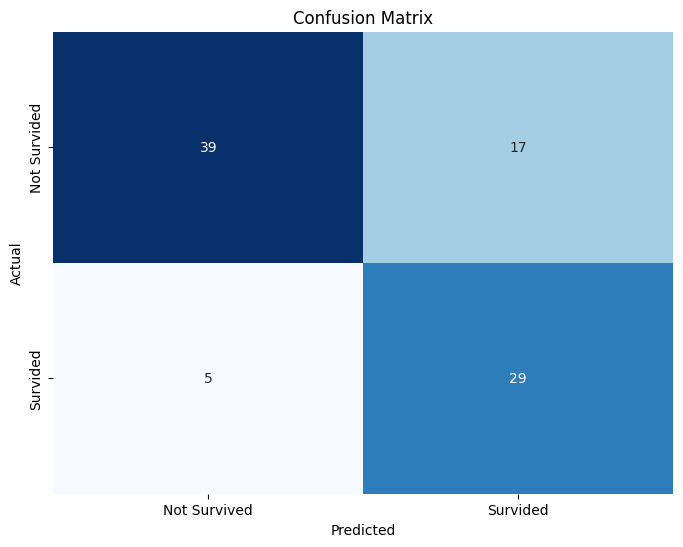

Accuracy: 0.7555555555555555
Precision: 0.6304347826086957
Recall: 0.8529411764705882
F1 Score: 0.725


In [54]:
accuracy = accuracy_score(test_targets, binary_predictions)
precision = precision_score(test_targets, binary_predictions)
recall = recall_score(test_targets, binary_predictions)
f1 = f1_score(test_targets, binary_predictions)

conf_matrix = confusion_matrix(test_targets, binary_predictions)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Survived', 'Survided'],
            yticklabels=['Not Survided', 'Survided'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Como podemos observar tanto en la matriz de confusión como en los valores de las métricas de rendimiento, a diferencia de la primera matriz se obtuvieron valores más reducidos. Por ejemplo, en el modelo refinado sin aplicar metodologías de regularización se obtuvo un valor de *accuracy* o exactitud de **82%**, mientras que con la regularización se obtuvo un valor de **80%**. Al ser la regularización otra variable que necesita de muchas pruebas para encontrar su valor óptimo y que su impacto se refleje en los resultados, no se espera que mejorara los resultados del modelo refinado. Es por ello que al jugar un poco con este valor, decidimos que sería mejor implementar regularización en 2 secciones entre capas, esto debido a la cantidad de capas existentes del modelo:

```
dropout_rate_1 = 0.53952
dropout_rate_2 = 0.46569
```
Hasta ahora, estos 2 valores nos han otorgado resultados bastante buenos con respecto a métricas y matriz de riesgos:


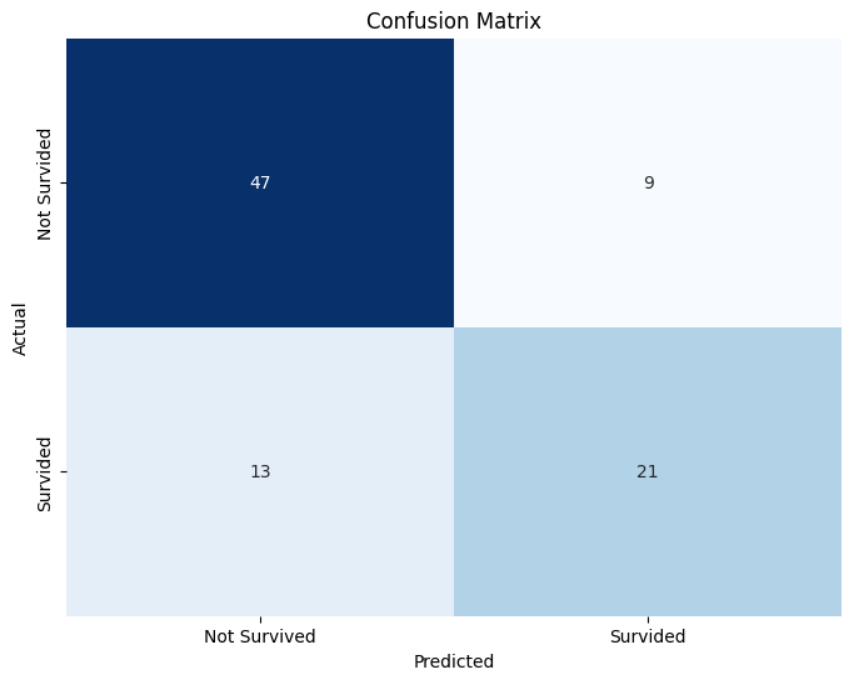
<br/>
* Accuracy: 0.8
* Precision: 0.7629625686226
* Recall: 0.7058823529411765
* F1 Score: 0.7164179104477613


## Resultados

El algoritmo arrojó resultados algo peculiares, y es que al parecer está eligiendo una combinación de hiper-parámetros que no resultan ser muy distintos o mejores en comparación a la configuración que teníamos previamente en entregas anteriores. Además, el código para implementar GridSearch demora demasiado en ejecutarse, por lo que no nos fue posible probar con gran cantidad de combinaciones, más problemas de conexión o fallos del código posterior a la implementación del GridSearch. A pesar de ello, logramos probar algunas configuraciones, que podrán no ser las que mejor redimiento representan, pero son los resultados que nos proporcionó esta metodología hasta el momento:


| Configuración Original de la Red Neuronal        | Hyperparameter GridSearch Results              | Hyperparameter GridSearch Results              | Hyperparameter GridSearch Results              |
|--------------------------------------------------|--------------------------------------------------|--------------------------------------------------|--------------------------------------------------|
| Best Score: 0.8212290502793296                   | Best Score: 0.8160243000153647                   | Best Score: 0.8188313300003546                   | Best Score: 0.8230448297462445                   |
| Best Parameters:                                 | Best Parameters:                                 | Best Parameters:                                 | Best Parameters:                                 |
| - 'activation': 'relu'                          | - 'activation': 'relu'                          | - 'activation': 'relu'                          | - 'activation': 'relu'                          |
| - 'batch_size': 32                              | - 'batch_size': 64                              | - 'batch_size': 32                              | - 'batch_size': 16                              |
| - 'epochs': 50                                  | - 'epochs': 50                                  | - 'epochs': 30                                  | - 'epochs': 20                                  |
| - 'neurons1': 50                               | - 'neurons1': 50                               | - 'neurons1': 10                               | - 'neurons_per_layer': 20                      |
| - 'neurons2': 15                               | - 'neurons2': 15                               | - 'neurons2': 15                               | - 'num_layers': 2                              |
| - 'neurons3': 75                               | - 'neurons3': 75                               | - 'neurons3': 6                                | - 'optimizer': 'adam'                         |
| - 'optimizer': 'adam'                          | - 'optimizer': 'adam'                          | - 'optimizer': 'adam'                          | - 'activation': 'relu'                         |
| Parameter Grid:                                  | Parameter Grid:                                  | Parameter Grid:                                  | Parameter Grid:                                  |
| - optimizer: ['adam']                           | - optimizer: ['adam', 'sgd']                   | - optimizer: ['adam', 'sgd']                   | - optimizer: ['adam', 'sgd']                   |
| - activation: ['relu', 'sigmoid']               | - activation: ['relu', 'sigmoid']               | - activation: ['relu', 'sigmoid', 'softmax', 'tanh'] | - activation: ['relu', 'sigmoid', 'softmax', 'tanh'] |
| - neurons1: [50]                               | - neurons1: [50, 100]                         | - neurons1: [5, 10]                           | - num_layers: [1, 2, 3]                        |
| - neurons2: [5]                                | - neurons2: [30, 15]                          | - neurons2: [10, 15]                         | - neurons_per_layer: [5, 10, 15, 20]           |
| - neurons3: [10]                               | - neurons3: [75, 40]                          | - neurons3: [6, 12]                           | - epochs: [5, 10, 20, 30]                      |
| - epochs: [50]                                 | - epochs: [50, 100]                           | - epochs: [5, 10, 20, 30]                      | - batch_size: [16, 32, 64]                     |
| - batch_size: [32]                             | - batch_size: [32, 64]                         | - batch_size: [16, 32, 64]                     | Test Accuracy: 79.89%                           |
|--------------------------------------------------|--------------------------------------------------|--------------------------------------------------|--------------------------------------------------|
| Test Accuracy: 81.01%                           | Test Accuracy: 79.89%                           | Test Accuracy: 79.89%                           | Test Accuracy: 79.89%                           |


## Conclusiones

El procedimiento de Grid Search es una búsqueda exhaustiva que genera candidatos tentativos para los hiperparámetros que mejor se ajusten al modelo y a los datos de entrada, en este caso, el conjunto de datos del Titanic. Esto nos permite explorar diversas opciones y configuraciones para encontrar la que proporcione los resultados óptimos y se adapte mejor al contexto del problema. Decidimos que esta metodología es una de las mejores opciones que pudimos elegir para probar múltiples configuraciones, compararlas y clasificarlas de acuerdo a su rendimiento y mejoramiento de resultados en comparación con los obtenidos previamente en entregas pasadas, que es de 82% de accuracy aproximadamente. El factor que influencia bastante los resultados de esta entrega fue el tiempo, el método demora demasiado tiempo en ejecutarse y en probar las distintas opciones que le proporcionamos, es por ello que seguiremos intentando implementar GridSearch previo a la entrega final para obtener la configuración más óptima de nuestro modelo.

Aún teniendo estos resultados, creemos firmemente que esta configuración existe, y se puede maximizar el rendimiento de las redes neuronales para este caso, inclusive para llegar al menos a un 85% de accuracy o tal vez si somos optimistas acercarnos al 90%. Al final de todo, se trata del uso de un algoritmo básico de Machine Learning que busca generar una clasificación binaria no tan compleja como podrían serlo otros algoritmos que necesitan de una cantidad exorbitante de datos para realizar predicciones certeras según su contexto. Lo importante ante esta situación es tener en cuenta todo el procedimiento que llevamos a cabo y aprender cómo es que se lleva a cabo la construcción de un modelo de aprendizaje máquina desde la limpieza de datos, investigación, identificación de los modelos, hasta la implementación, selección, refinamiento y regularización.


## Referencias

* 3.2. Tuning the hyper-parameters of an estimator. (s. f.). scikit-learn. https://scikit-learn.org/stable/modules/grid_search.html